# Sample Selection: Heckman Model

We are interested in estimating the model

```{math}
\begin{equation}
\mathbf{y^*=xb + \epsilon}
\end{equation}
```
but for a subset of our data, the dependent variable is either missing
or coded to some arbitrary values (e.g. 0 or -999). Of concern however,
is that the pattern of this missingness is non-random in a way that
could induce bias in our estimated $\beta$\'s if we apply OLS to
observed values from the above equation.

## Selection Mechanism

Suppose that the pattern of missingness (I\'ll refer to this as censored
hereafter) is related to the latent (unobserved) process

```{math}
\begin{equation}
\mathbf{z}^* = \mathbf{w}\gamma + \mathbf{u}
\end{equation}
```
From this process, the researcher can observe

```{math}
\begin{align}
z_i =& 1 \text{ if } z^*_i > 0 \\
    =&0 \text{ if } z^*_i \le 0
\end{align}
```
or $z_i=1$ ($y_i$ not censored) when

```{math}
\begin{equation}
u_i \ge - \mathbf{w}_i\gamma
\end{equation}
```
The probability of $y_i$ not censored is

```{math}
\begin{align}
Pr(u_i \ge - \mathbf{w}_i\gamma) =& 1- \Phi(-\mathbf{w}_i\gamma)\\
&=\Phi(\mathbf{w}_i\gamma)
\end{align}
```
if we are willing to assume that $\mathbf{u}\sim
N(\mathbf{0},\mathbf{I})$. Note for identification purposes in the
Heckman Model we restrict $Var(u_i) = 1$. Also note that $1-
\Phi(-\mathbf{w}_i\gamma)=\Phi(\mathbf{w}_i\gamma)$ by symmetry of the
standard normal distribution.

To visualize this, consider the following figure. The probability of
$y_i$ not being censored ($Pr(u_i \ge - \mathbf{w}_i\gamma)$) is the set
of errors greater than $-\mathbf{w}_i\gamma$. The probability that an
error draw satisfies this condition is the darker shaded area to the
right of $-\mathbf{w}_i\gamma$.

```{figure} /_static/lectures/mle_heckman/heckman_selection.png
:width: 80%
:name: heckman_probs
 
Probabilities in the Selection Mechamism
```

## Amounts Mechanism and Sample Selection Bias

Having constructed a model a model for censoring, we can construct
\"amounts\" equation as follows. Denoting $\mathbf{y}$ as the not
censored (observed) dependent variable, the censoring model defines what
is in the estimation sample as

```{math}
\begin{align}
y_i = y^*_i = \mathbf{x}_i \beta + \epsilon_i \text{ observed, if $z_i$ = 1}
\end{align}
```
Finally, the joint distribution of the errors in the selection ($u_i$)
and amounts equation ($\epsilon$) is distributed iid as

```{math}
\begin{equation}
\begin{bmatrix} u_i \\ \epsilon_i \end{bmatrix} \sim Normal\left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & \rho \\ \rho & \sigma^2_\epsilon \end{bmatrix}  \right) 
\end{equation}
```
To see how the selection and amounts model are related, consider

```{math}
\begin{align}
E(y_i | y_i \text{ observed}) = & E(y_i | z^* > 0 ) \\
=&E(y_i | u_i > -\mathbf{w}_i \gamma) \\
=&\mathbf{x}_i \beta + E(\epsilon_i | u_i > -\mathbf{w}_i \gamma) \\
=&\mathbf{x}_i \beta + \rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)}
\end{align}
```
What is immediately apparent is that the conditional mean ($E(y_i |
y_i \text{ observed})$) differs from the unconditional mean
($\mathbf{x}_i\beta$) only if $\rho \neq 0$ since all the other elements
in the far right hand term (i.e., the variance of the error in the
amounts equation, $\sigma_\epsilon$, and the Inverse Mills Ratio,
$\frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)}$) in the
preceding equation are strictly positive. So if the errors in the
amounts and selection equations are uncorrelated ($\rho=0$) we can
safely apply ordinary least squares to uncover unbiased estimates for
$\beta$ and can ignore endogenous selection effects and the selection
equation portion of the model.

However, there are some further nuances to consider. Denoting the
correlation amongst the two sets of independent variables in the model
$\mathbf{x},\mathbf{w}$ as $\rho_{\mathbf{x},\mathbf{w}}$, we examine
the following four cases of correlation patterns amongst data and
errors. As the final equation above shows, when $\rho$ is zero ({ref}`case1`
and {ref}`case2`) below, OLS will always give unbiased $\beta$ even if
$\rho_{\mathbf{x},\mathbf{w}}$ is non-zero. This is happening because
the missingness patterns in $\mathbf{y}$ are essentially random or
select cases in ways that are symmetric around the regression line that
preserves slope and intercept coefficients (we have plots below of these two cases
later for providing more intuition about this statement).

```{figure} /_static/lectures/mle_heckman/heckman_example_rho_0_rhoxy_0.png
:width: 100%
:name: case1

Case 1
```


```{figure} /_static/lectures/mle_heckman/heckman_example_rho_0_rhoxy_8.png
:width: 100%
:name: case2

Case 2
```

{ref}`case3` and {ref}`case4` are more
interesting and represent instances where OLS will be inconsistent and
we should apply the Heckman Model. For gaining intuition about how
cases 3 and 4 differ consider again the conditional mean

```{math}
\begin{equation}
E(y_i | y_i \text{ observed}) = \mathbf{x}_i \beta + \rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)}
\end{equation}
```
We can think of the preceding equation as guiding the regression
equation we ought to be estimating if the sample selection process as
outlined above is happening. If instead, we ignore the final term
($\rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i
\gamma)}{\Phi(\mathbf{w}_i \gamma)}$) when in fact $\rho\neq 0$ then we
are putting this information into the error term of the misppecified OLS
model regressing $\mathbf{y}$ on $\mathbf{x}$ making the estimation
equation

```{math}
\begin{equation}
\mathbf{y = x \tilde{\beta} + \psi}
\end{equation}
```
where $\psi = \rho \sigma_\epsilon \mathbf{IMR} + \epsilon$, where
$\mathbf{IMR}$ is the $N \times 1$ vector

```{math}
\begin{equation}
\begin{bmatrix}  
\frac{\phi(\mathbf{w}_1 \gamma)}{\Phi(\mathbf{w}_1 \gamma)}\\
\vdots \\
\frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)} \\
\vdots \\
\frac{\phi(\mathbf{w}_N \gamma)}{\Phi(\mathbf{w}_N \gamma)}
\end{bmatrix}
\end{equation}
```
For the OLS estimator to be unbiased in this context, we need
$E[\mathbf{b}] = \beta$, so that (without showing steps in proof which
is analogous to the OLS proof of unbiasedness):

```{math}
\begin{align}
E[\mathbf{b}] =& \beta +E[(\mathbf{x'x})^{-1}\rho \sigma_\epsilon \mathbf{x}'\mathbf{IMR} + (\mathbf{x'x})^{-1}\mathbf{x}'\epsilon] \\
=& \beta + \rho \sigma (\mathbf{x'x})^{-1}E[\mathbf{x}'\mathbf{IMR}]
\end{align}
```
since $E[\mathbf{x}'\epsilon]=0$ and $\rho$ and $\sigma_\epsilon$ are
unknown constants. If $\rho \neq 0$, this term won\'t be zero.
Simplifying the last term from above further, we have

```{math}
\begin{align}
\rho \sigma (\mathbf{x'x})^{-1}E[\mathbf{x}'\mathbf{IMR}] =  \rho \sigma (\mathbf{x'x})^{-1}(\mathbf{x}'\mathbf{IMR} + Cov(\mathbf{x}',\mathbf{IMR}))
\end{align}
```

```{figure} /_static/lectures/mle_heckman/heckman_example_rho_8_rhoxy_0.png
:width: 100%
:name: case3

Case 3
```
For {ref}`case3`, the independent variables in the model $\mathbf{x}$ and
$\mathbf{w}$ are uncorrelated so it is likely that
$Cov(\mathbf{x}',\mathbf{IMR})$ is very close to zero, since all
variation in the relationship is being driven by the two sets of
independent variables in the model ($\mathbf{x}$ and $\mathbf{w}$).
Setting $Cov(\mathbf{x}',\mathbf{IMR})=0$, shows that there will still
be bias since $\mathbf{x}'\mathbf{IMR}$ won\'t be zero. Here we are
adding (or subtracting depending on the sign of $\rho$) a constant value
to the model with mean $\rho \sigma (\mathbf{x'x})^{-1}
\mathbf{x}'\mathbf{IMR}$. So this miss-specified model\'s constant term
will need to depart from the true value $\beta_0$ to account for this
positive or negative shift in the mean value of all observation\'s
errors. However, since there is no correlation amongst $\mathbf{x}$ and
$\mathbf{w}$ in our miss-specified OLS model we won\'t impart missing
variable bias on our slope coefficients. We see this in {ref}`case3`. 
Cases that are selected tend to have higher draws
for $\epsilon$. So the points that are censored tend to be below (for
our case here) in a way that would only affect the intercept
coefficient.

For Case 4, we have the bias imparted on our intercept coefficient as
discussed above and bias induced by correlation between our model error
$\psi$ and $\mathbf{x}$ (since $\mathbf{x}$ and $\mathbf{w}$ are
correlated). This has the effect of also biasing our slope coefficients.
{ref}`case4` shows how this is happening visually. As in Case
3, the observations that tend to be included in the amounts equation
(the dark points in the right panel) on average tend to be above the
True Regression line. This is happening because in the selection
equation we tend select observations having higher draws of $u_i$. Since
(for this example) $u_i$ and $\epsilon_i$ are positively correlated, we
also tend to be selecting cases above the True regression line.
Additionally, when $\mathbf{w}$ and $\mathbf{x}$ are correlated the
cases we select tend to be (for this example) higher values of our
independent variable $\mathbf{x}$ (since higher values of $\mathbf{z}$
tend to be selected). This has the effect of shifting the some of points
that are censored (compared to Case 3) below the regression line which
can lead to bias in slope and intercept if we apply OLS.

```{figure} /_static/lectures/mle_heckman/heckman_example_rho_8_rhoxy_8.png
:width: 100%
:name: case4

Case 4
```

## Model Log-Likelihood

Defining person i\'s contribution to the log-likelihood function ($C_i$)
as

```{math}
\begin{equation}
  \small
C_i = 
\left\{
\begin{aligned}
 &ln\Phi \left(\frac{\mathbf{w_i \gamma} + \rho \left (\frac{y_i - \mathbf{x}_i \beta}{\sigma_\epsilon}\right)}   {\sqrt{1 - \rho^2}}\right) - \frac{1}{2} \left( \frac{y_i - \mathbf{x}_i\beta}{\sigma_{\epsilon}} \right)^2-ln\left(\sigma_{\epsilon}\sqrt{2\pi}\right) \text{, $z_i$ = 1}\\
&ln\left( 1 - \Phi(\mathbf{w}_i\gamma) \right) \text{, $z_i$ = 0}
\end{aligned}
\right.
\end{equation}
```
The log-likelihood function is

```{math}
\begin{equation}
LogL = \sum_{i = 1}^N C_i
\end{equation}
```
Source: Stata pdf manual for Heckman Model.

## Two-step Estimation

There are two estimators one can employ. The first method (known as the
two-step method) was the only practical way to estimate the model when
the paper was first published in 1979. This method follows these steps:

1.  Run Probit on the Selection Model

2.  Recover Estimated Inverse Mills Ratio

3.  Using Odinary Least Squares, run the regression

    ```{math}
    \begin{equation}
      y_i  = \mathbf{x}_i \beta + \rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i \hat{\gamma})}{\Phi(\mathbf{w}_i \hat{\gamma})}
    \end{equation}
    ```
    where $\rho \sigma_\epsilon$ is treated as a single parameter to be
    estimated.

4.  \"Back Out\" separate estimates for $\rho$ and $\sigma_\epsilon$

5.  Adjust standard errors to account for the fact that the Inverse
    Mills Ratio is an estimate (and hence random) covariate in the above
    model.

The key two steps are to first run a probit and using information from
the results from that model estimate a corrected form of the OLS model.
This is the only estimation method available in a beta branch of Python
Statsmodels as of November 2018.

The second and preferred method is to use Maximum Likelihood over the
full parameter set $\beta, \gamma, \rho$, and $\sigma$ in the
log-likelihood function above. This is the default method in Stata.

## Code for this Lecture

The python code generating the toy data for the figures above is given
below. This version examines Case 4.[^fn1]

In [1]:
# or ["remove_output", "remove_input"]
# start a connected stata17 session
from pystata import config
config.init('be')
config.set_streaming_output_mode('off')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user  perpetual
Serial number: 301706306291
  Licensed to: Rob Hicks
               College of William and Mary

Notes:
      1. Unicode is supported; see help unicode_advice.


In [2]:
import numpy as np
import pandas as pd

# true parameters
rho_t = np.array([0.8])
rho_x_w_t = np.array([0.8])
gamma_t = np.array([.5,1.0])
beta_t = np.array([-2.0,0.5])
sigma_e_t = np.array([1.0])
N =5000

# generate toy data consistent with heckman:
# generate potentially correlated x,w data
mean_x_w = np.array([0,0])
cov_x_w = np.array([[1,rho_x_w_t[0]],[rho_x_w_t[0], 1]])
w, x = np.random.multivariate_normal(mean_x_w, cov_x_w, N).T

# add constant to first position and convert to DataFrame
w_ = pd.DataFrame(np.c_[np.ones(N),w],columns=['Constant (Selection)','Slope (Selection)'])
x_ = pd.DataFrame(np.c_[np.ones(N),x], columns=['Constant','Slope'])

# generate errors 
mean_u_eps = np.array([0,0])
cov_u_eps = np.array([[1,rho_t[0]],[rho_t[0],sigma_e_t[0]]])
u, epsilon = np.random.multivariate_normal(mean_u_eps, cov_u_eps, N).T

# generate latent zstar
zstar = w_.dot(gamma_t) + u
# generate observed z (indicator=1 if zstar is positive)
z = zstar > 0  

# generate latent ystar
ystar = x_.dot(beta_t) + epsilon
y=ystar.copy()
# generate observed y [if z=0, set y to NaN]
y[~z] = np.nan

stata_data = pd.DataFrame(np.c_[y,z,x,w], columns=['y','z','x','w'])

We can estimate a Two-Step Heckman Model in Python using an [unmerged
branch](https://github.com/statsmodels/statsmodels/blob/92ea62232fd63c7b60c60bee4517ab3711d906e3/statsmodels/regression/heckman.py)
from StatsModels (this replicates the Stata two-step results).

In [3]:
import heckman as heckman
res = heckman.Heckman(y, x_, w_).fit(method='twostep')
print(res.summary())

       Heckman Regression Results      
Dep. Variable:                        y
Model:                          Heckman
Method:                Heckman Two-Step
Date:                  Wed, 12 May 2021
Time:                          20:08:34
No. Total Obs.:                    5000
No. Censored Obs.:                 1781
No. Uncensored Obs.:               3219
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -2.0513      0.037    -56.034      0.000      -2.123      -1.980
Slope          0.5220      0.024     22.152      0.000       0.476       0.568
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Constant (Selection)     0.5082      0.022     23.485      0.000       0.466       0.551
Slope (Selection)        0.9699      0.028     35.139    

And in Stata, we can estimate the Full Information Maximum Likelihood
model over the toy dataset as

In [4]:
%%stata -d stata_data
heckman y x, select(z=w)


Iteration 0:   log likelihood = -6399.8325  
Iteration 1:   log likelihood =  -6399.682  
Iteration 2:   log likelihood =  -6399.682  

Heckman selection model                         Number of obs     =      5,000
(regression model with sample selection)              Selected    =      3,219
                                                      Nonselected =      1,781

                                                Wald chi2(1)      =     780.31
Log likelihood = -6399.682                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
y            |
           x |   .5217493   .0186779    27.93   0.000     .4851412    .5583573
       _cons |  -2.050437    .023024   -89.06   0.000    -2.095563    -2.00531
-------------+------------------------------------------

Note all stata commands I've tried are affected, not just `heckman`:

In [5]:
%%stata 
sum


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
           y |      3,219   -1.548325    .9189972  -4.196408   1.743137
           z |      5,000       .6438    .4789232          0          1
           x |      5,000   -.0035326    .9917389  -3.710542   3.988508
           w |      5,000   -.0006412    .9910702  -3.795649   4.062603


In [6]:
%%stata 
list y x in 1/10


     +-------------------------+
     |          y            x |
     |-------------------------|
  1. | -1.3905243   -1.1135177 |
  2. | -1.7744037    .50311251 |
  3. | -.70513145    .94077079 |
  4. | -1.7195475   -.14398389 |
  5. | -2.4298932   -.72810217 |
     |-------------------------|
  6. |          .   -2.2648907 |
  7. |          .    .09402595 |
  8. | -1.4251981   -.79725266 |
  9. |          .   -1.1621861 |
 10. |          .   -.11346969 |
     +-------------------------+


In [7]:
%%stata 
reg y x


      Source |       SS           df       MS      Number of obs   =     3,219
-------------+----------------------------------   F(1, 3217)      =    325.12
       Model |  249.456338         1  249.456338   Prob > F        =    0.0000
    Residual |  2468.32443     3,217  .767275234   R-squared       =    0.0918
-------------+----------------------------------   Adj R-squared   =    0.0915
       Total |  2717.78076     3,218  .844555862   Root MSE        =    .87594

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
           x |   .3068789   .0170194    18.03   0.000     .2735088    .3402489
       _cons |   -1.64118   .0162751  -100.84   0.000    -1.673091    -1.60927
------------------------------------------------------------------------------


In [8]:
%%stata 
bstrap: reg y x

(running regress on estimation sample)

Bootstrap replications (50)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50

Linear regression                                       Number of obs =  3,219
                                                        Replications  =     50
                                                        Wald chi2(1)  = 341.23
                                                        Prob > chi2   = 0.0000
                                                        R-squared     = 0.0918
                                                        Adj R-squared = 0.0915
                                                        Root MSE      = 0.8759

------------------------------------------------------------------------------
             |   Observed   Bootstrap                         Normal-based
           y | coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+---------------------

(bin=35, start=-4.1964085, width=.1697013)


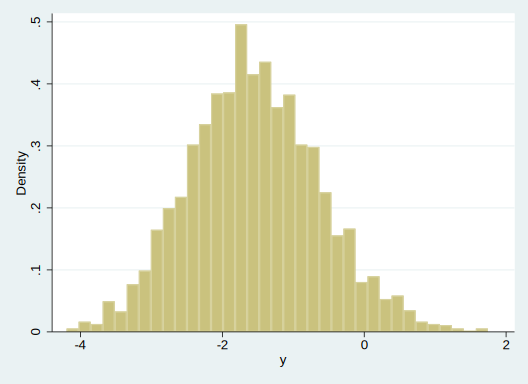

In [9]:
%%stata 
hist y

[^fn1]: Note, we are using Stata 17 Jupyter Notebook integration using the `%%stata` magic.